<a href="https://colab.research.google.com/github/AnnaK8090/CIND-820_Big-Data-Analytics-Project/blob/main/CIND_820_Big_Data_Analytics_Project_1_basic_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Importing libraries:
import numpy as np 
import pandas as pd      
import seaborn as sns

In [5]:
# 2. Loading csv files and saving into a dataframes:
customersDF = pd.read_csv("olist_customers_dataset.csv")
geolocationDF = pd.read_csv("olist_geolocation_dataset.csv")
order_itemsDF = pd.read_csv("olist_order_items_dataset.csv")
order_paymentsDF = pd.read_csv("olist_order_payments_dataset.csv")
order_reviewsDF = pd.read_csv("olist_order_reviews_dataset.csv")
ordersDF = pd.read_csv("olist_orders_dataset.csv")
productsDF = pd.read_csv("olist_products_dataset.csv")
sellersDF = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

In [6]:
# 3. Joining dataframes into a Master DataFrame:
masterDF = ordersDF.copy()
masterDF = masterDF.merge(customersDF,on='customer_id')
masterDF = masterDF.merge(order_reviewsDF,on='order_id')
masterDF = masterDF.merge(order_paymentsDF,on='order_id')
masterDF = masterDF.merge(order_itemsDF,on='order_id')
masterDF = masterDF.merge(productsDF,on='product_id')
masterDF = masterDF.merge(sellersDF,on='seller_id')
masterDF = masterDF.merge(product_category_name_translation,on='product_category_name')

In [7]:
# 4.Checking data types and null-values:
masterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   customer_zip_code_prefix       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  review_id                     

In [8]:
# 5. Checking descriptive statistics for some numeric columns:
masterDF[["review_score","price","product_photos_qty","product_weight_g"]].describe(include="all")

,review_score,price,product_photos_qty,product_weight_g
count,115609.000000,115609.000000,115609.000000,115608.000000
mean,4.034409,120.619850,2.205373,2113.907697
std,1.385584,182.653476,1.717771,3781.754895
min,1.000000,0.850000,1.000000,0.000000
25%,4.000000,39.900000,1.000000,300.000000
50%,5.000000,74.900000,1.000000,700.000000
75%,5.000000,134.900000,3.000000,1800.000000
max,5.000000,6735.000000,20.000000,40425.000000


In [9]:
# 6. Checking the duplicates:
masterDF.duplicated().sum()

0

In [10]:
# 7. Checking null values:
masterDF.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


In [11]:
# 8. Splitting categorical and numerical features for further analysis:
cat_features = ['order_status','customer_city','customer_state','payment_type','seller_city','seller_state','product_category_name_english']
num_features = ['review_score','payment_value','price','freight_value','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']

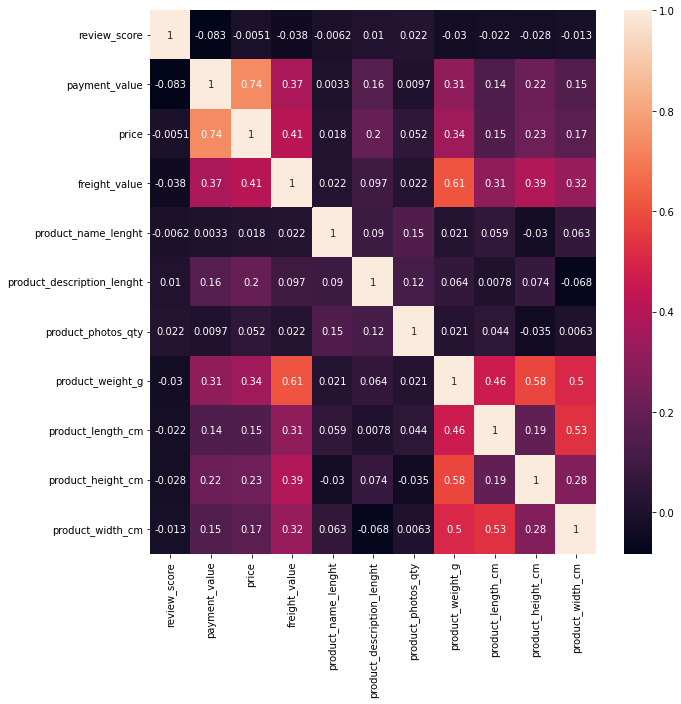

In [12]:
# 9. Correlation matrix for numeric features:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(masterDF[num_features].corr(method='pearson'),annot=True)

In [29]:
# 10. Checking categorical variables distribution: 
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once we are defining our own function:

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(25,15))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='barh',ax=subPlot[plotNumber])

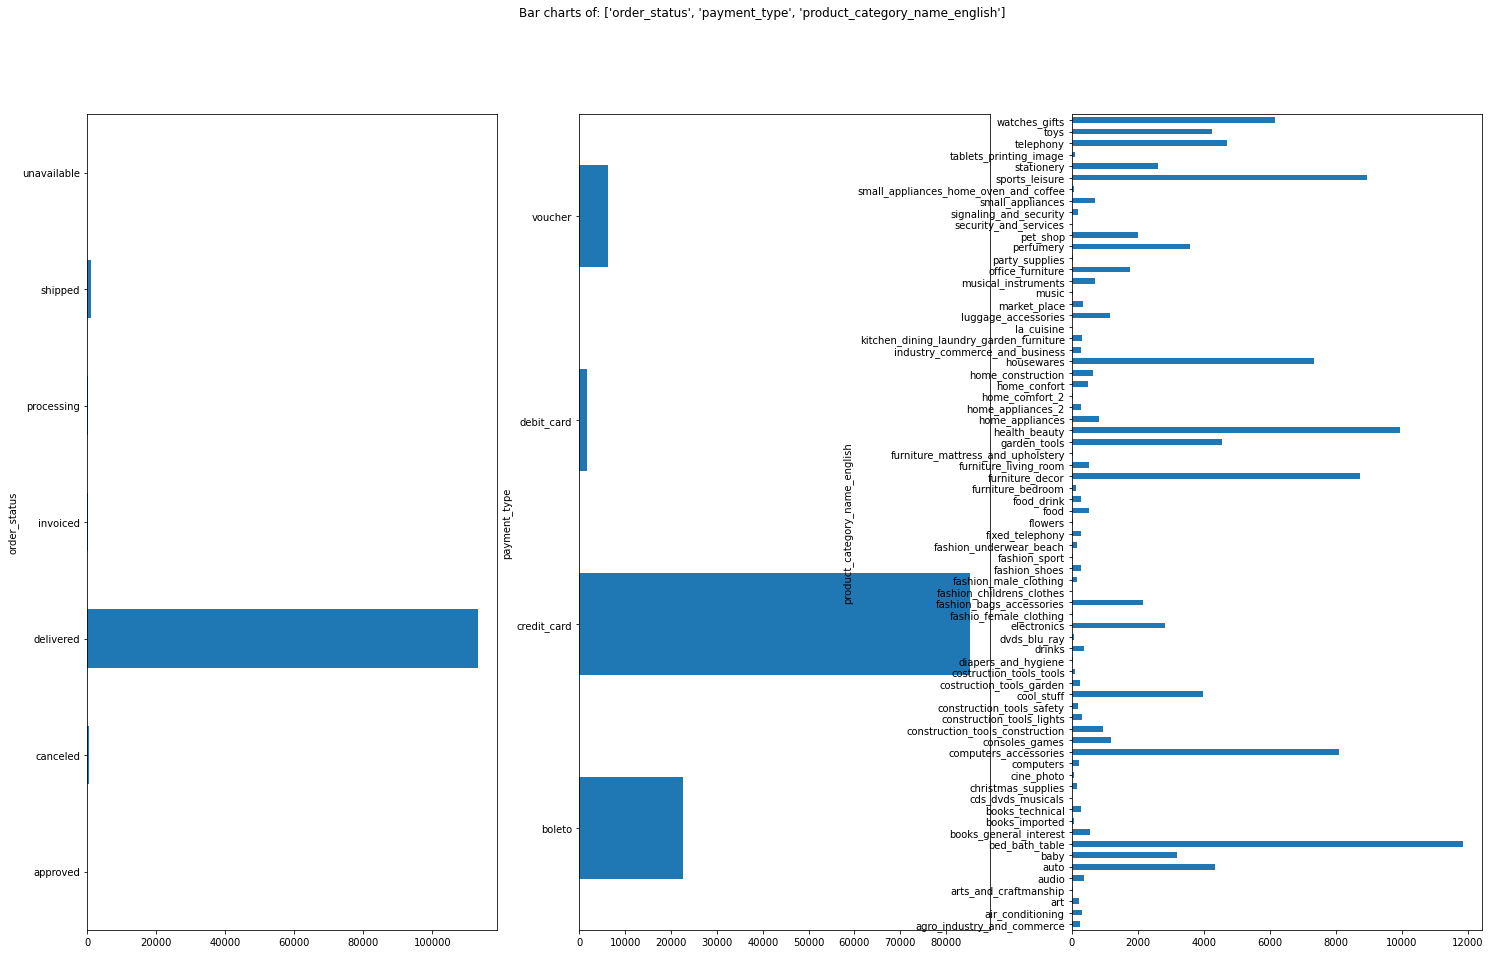

In [27]:
PlotBarCharts(inpData=masterDF, 
              colsToPlot=['order_status','payment_type','product_category_name_english'])

In [30]:
# 11. Filtering only Delivered orders:
selected_oder_status = ['delivered'] 
    
masterDF = masterDF.loc[masterDF['order_status'].isin(selected_oder_status)] 
    
masterDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113210 entries, 0 to 115608
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113210 non-null  object 
 1   customer_id                    113210 non-null  object 
 2   order_status                   113210 non-null  object 
 3   order_purchase_timestamp       113210 non-null  object 
 4   order_approved_at              113196 non-null  object 
 5   order_delivered_carrier_date   113208 non-null  object 
 6   order_delivered_customer_date  113202 non-null  object 
 7   order_estimated_delivery_date  113210 non-null  object 
 8   customer_unique_id             113210 non-null  object 
 9   customer_zip_code_prefix       113210 non-null  int64  
 10  customer_city                  113210 non-null  object 
 11  customer_state                 113210 non-null  object 
 12  review_id                     

In [31]:
# 12. Checking dataframe shape (rows x columns count):
masterDF.shape

(113210, 40)

In [32]:
# 13. Saving dataframe to csv file:
masterDF.to_csv ('MasterDF.csv', index = None, header=True)